**Name** = Jafar Vohra

**uni** = jv2775

# MNIST Sign Language

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [26]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential()

        model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
        model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
        model.add(Dropout(rate=0.25))

        model.add(Conv2D(64,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
        model.add(MaxPooling2D((2,2),2,padding='same'))
        model.add(Dropout(rate=0.25))

        model.add(Conv2D(128,kernel_size=(3,3),strides=1,activation='relu',padding='same'))
        model.add(MaxPooling2D((2,2),2,padding='same'))
        model.add(Dropout(rate=0.25))
          
        model.add(Flatten())
        model.add(keras.layers.Dense(128, activation='relu'))
        model.add(Dense(units=25,activation='softmax'))
            
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        
        x_train, x_test, y_train, y_test = train_test_split(images, labels, 
                                                                    test_size = 0.3, 
                                                                    random_state = 12345)
        
        x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
        x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

        y_train = to_categorical(y_train, num_classes = 25)
        y_test = to_categorical(y_test, num_classes = 25)

        self.data = {
            "train": (x_train, y_train),
            "test" : (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """

        history = self.model.fit(self.data["train"][0],
                                 self.data["train"][1],
                                 batch_size=batch_size,
                                 epochs = epochs,
                                 verbose = verbose,
                                 validation_data=(self.data["test"]),
                                 shuffle=1)
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help

        test_data = data.reshape(data.shape[0], *(28, 28, 1))
        return np.argmax(self.model.predict(test_data), axis=1)
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [32]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [33]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

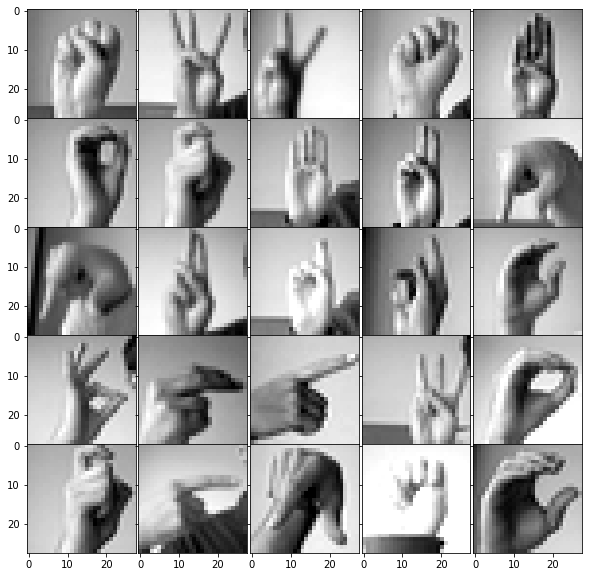

In [34]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
151/151 [==============================] - 2s 10ms/step - loss: 5.3784 - accuracy: 0.0443 - val_loss: 3.2127 - val_accuracy: 0.0438
Epoch 2/30
151/151 [==============================] - 1s 9ms/step - loss: 3.2034 - accuracy: 0.0517 - val_loss: 3.1580 - val_accuracy: 0.0647
Epoch 3/30
151/151 [==============================] - 1s 8ms/step - loss: 2.8666 - accuracy: 0.1499 - val_loss: 1.7283 - val_accuracy: 0.4907
Epoch 4/30
151/151 [==============================] - 1s 9ms/step - loss: 1.2822 - accuracy: 0.5727 - val_loss: 0.5163 - val_accuracy: 0.8485
Epoch 5/30
151/151 [==============================] - 1s 8ms/step - loss: 0.5999 - accuracy: 0.7874 - val_loss: 0.1819 - val_accuracy: 0.9692
Epoch 6/30
151/151 [==============================] - 1s 9ms/step - loss: 0.3395 - accuracy: 0.8815 - val_loss: 0.0760 - val_accuracy: 0.9892
Epoch 7/30
151/151 [==============================] - 1s 8ms/step - loss: 0.2117 - accuracy: 0.9267 - val_loss: 0.0216 - val_accuracy: 0.9995
Epoch

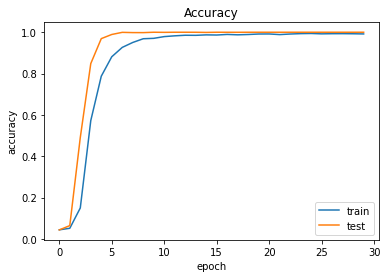

In [35]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [36]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 0s 2ms/step
0.9644450641383157
